## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


## Understanding the Data

### googleplaystore.csv:
I have downloaded a google play store dataset, **googleplaystore.csv** from kaggle.

- **App**: The name of the app
- **Category**:The category of the app
- **Rating**:The rating of the app in the play store
- **Reviews**:The number of reviews of the app
- **Size:The** size of the app
- **Installs**:The number of installs of the app	
- **Type**:The (Free/Paid) type of the app
- **Price**:The price of the app(0 if the app is free)	
- **Content Rating**:The appropriate target audience of the app	
- **Genres**:The genre of the app
- **Last Updated**:The date when the app was last updated
- **Current Ver**:The current version of the app
- **Android Ver**:The minimum android version required to run the app 



## Reading the data 


In [2]:
df=pd.read_csv("D:\Ashvini\Data Science\Data for practise\googleplaystore.csv")

In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.shape

(10841, 13)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


## Data Cleaning

### Missing Values
Checking for missing values

In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

It is clear that we have missing values in **Rating*,  Type*,*Content Rating*,*Current ver*, and  Android ver**.

**Handling missing values**

In [9]:
mean_rating=df['Rating'].mean()

In [10]:
df['Rating'].fillna(mean_rating,inplace=True)

In [11]:


df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [12]:


df.dropna(inplace=True)

In [13]:
df.shape

(10829, 13)

In [14]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


## Duplicates

In [16]:
df.duplicated().sum()

483

**Drop duplicate values**

In [17]:
df.drop_duplicates(inplace=True)

In [18]:


df.shape

(10346, 13)

In [19]:

col=df.columns.to_list()
col

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [20]:

for i in col:
    print("****************",i,"********************")
    print(df[i].value_counts())
    
        

**************** App ********************
ROBLOX                                           9
8 Ball Pool                                      7
Zombie Catchers                                  6
Helix Jump                                       6
Bubble Shooter                                   6
                                                ..
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9648, dtype: int64
**************** Category ********************
FAMILY                 1939
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOT

In [21]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [22]:
for i in col:
    if df[i].dtype=='object':
        print(i)

App
Category
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver


In [23]:
for i in col:
    if df[i].dtype=='float64':
        print(i)

Rating


In [24]:
df['Reviews'].dtype

dtype('O')

In [25]:
df['Reviews'].str

In [26]:
df['Reviews'].str.isnumeric().sum()

10346

In [27]:
df['Reviews']=df['Reviews'].astype("int")

In [28]:
df['Reviews'].dtype

dtype('int32')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  int32  
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [30]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [31]:
df['Size'].dtype

dtype('O')

In [32]:
df['Size']=df['Size'].str.replace("M",'000')
df['Size']=df['Size'].str.replace("k",'')

In [33]:
df['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '5.5000', '17000', '39000', '31000', '4.2000', '7.0000', '23000',
       '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000', '24000',
       'Varies with device', '9.4000', '15000', '10000', '1.2000',
       '26000', '8.0000', '7.9000', '56000', '57000', '35000', '54000',
       '201', '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.7000',
       '2.5000', '16000', '3.4000', '8.9000', '3.9000', '2.9000', '38000',
       '32000', '5.4000', '18000', '1.1000', '2.2000', '4.5000', '9.8000',
       '52000', '9.0000', '6.7000', '30000', '2.6000', '7.1000', '3.7000',
       '22000', '7.4000', '6.4000', '3.2000', '8.2000', '9.9000',
       '4.9000', '9.5000', '5.0000', '5.9000', '13000', '73000', '6.8000',
       '3.5000', '4.0000', '2.3000', '7.2000', '2.1000', '42000',
       '7.3000', '9.1000', '55000', '23', '6.5000', '1.5000', '7

In [34]:
df['Size']=df['Size'].replace('Varies with device','NaN')

In [35]:
df['Size'].dropna(inplace=True)

In [36]:
df['Size']=df['Size'].astype('float')

In [37]:
df['Size'].dtype

dtype('float64')

In [38]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1525
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [39]:
df.dropna(inplace=True)

In [40]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [41]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [42]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

In [43]:
df['Installs']=df['Installs'].str.replace("+",'')

In [44]:
df["Installs"].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000', '500,000,000', '50', '100', '500', '10', '1', '5',
       '1,000,000,000', '0'], dtype=object)

In [45]:
df['Installs'].dtype

dtype('O')

In [46]:
df['Installs']=df['Installs'].apply(lambda x:x.replace(',',''))

In [47]:
df['Installs']=df['Installs'].astype('float')

In [48]:
df['Installs'].dtype

dtype('float64')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8821 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8821 non-null   object 
 1   Category        8821 non-null   object 
 2   Rating          8821 non-null   float64
 3   Reviews         8821 non-null   int32  
 4   Size            8821 non-null   float64
 5   Installs        8821 non-null   float64
 6   Type            8821 non-null   object 
 7   Price           8821 non-null   object 
 8   Content Rating  8821 non-null   object 
 9   Genres          8821 non-null   object 
 10  Last Updated    8821 non-null   object 
 11  Current Ver     8821 non-null   object 
 12  Android Ver     8821 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 930.3+ KB


In [50]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [51]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99', '$5.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49', '$1.29',
       '$5.00', '$13.99', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99',
       '$109.99', '$154.99', '$3.08', '$2.59', '$4.80', '$8.99', '$1.96',
       '$19.40', '$15.46', '$3.04', '$4.29', '$2.60', '$3.28', '$4.60',
       '$28.99', '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99',
       '$3.61', '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [52]:
df['Price']=df['Price'].apply(lambda x:x.replace('$',''))

In [53]:
df['Price']=df['Price'].astype('float')

In [54]:
df['Price'].dtype

dtype('float64')

In [55]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df['Last Updated Year']=df['Last Updated'].apply(lambda d:int(d.strftime('%Y')))
df['Last Updated Month']=df['Last Updated'].apply(lambda d:int(d.strftime('%m')))

In [56]:
year_free_count=df[df['Type']=='Free'].drop(['Last Updated'],axis=1)

In [57]:
df['Android Ver']=df['Android Ver'].apply(lambda x:x.replace('and up',''))

In [58]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,Last Updated Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,2018,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8821 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 8821 non-null   object        
 1   Category            8821 non-null   object        
 2   Rating              8821 non-null   float64       
 3   Reviews             8821 non-null   int32         
 4   Size                8821 non-null   float64       
 5   Installs            8821 non-null   float64       
 6   Type                8821 non-null   object        
 7   Price               8821 non-null   float64       
 8   Content Rating      8821 non-null   object        
 9   Genres              8821 non-null   object        
 10  Last Updated        8821 non-null   datetime64[ns]
 11  Current Ver         8821 non-null   object        
 12  Android Ver         8821 non-null   object        
 13  Last Updated Year   8821 non-null   int64      

In [60]:
df.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           0
Android Ver           0
Last Updated Year     0
Last Updated Month    0
dtype: int64

In [61]:
df.shape

(8821, 15)

In [62]:
import seaborn as sns

In [63]:
num=[]
for i in df.columns:
    if df[i].dtype !='O':
        num.append(i)
num

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last Updated',
 'Last Updated Year',
 'Last Updated Month']

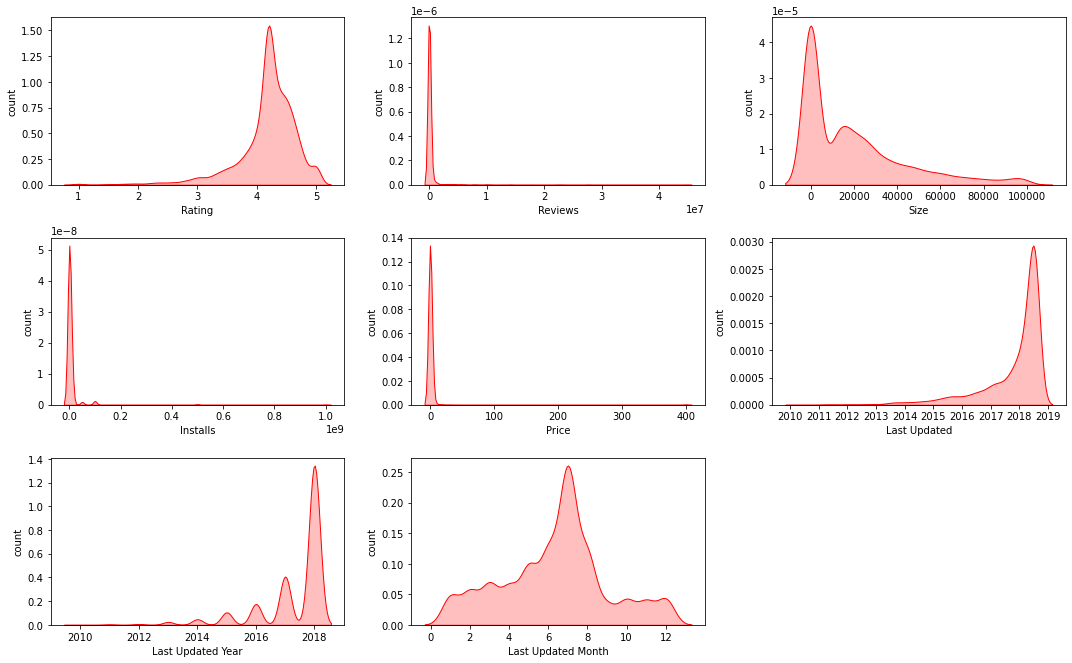

In [64]:
plt.figure(figsize=(15,15))
for i in range(0,len(num)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[num[i]],shade=True,color='r')
    plt.xlabel(num[i])
    plt.ylabel("count")
    plt.tight_layout()

In [65]:
cat=[]
for i in df.columns:
    if df[i].dtype =='O':
        cat.append(i)
cat

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [66]:
df['Type'].value_counts()

Free    8133
Paid     688
Name: Type, dtype: int64

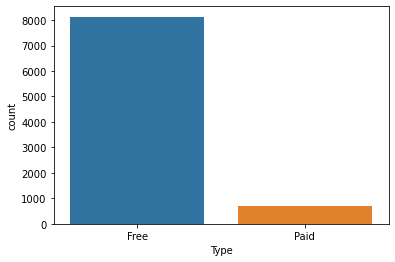

In [67]:
sns.countplot(df['Type'])
plt.show()

In [68]:
category=df['Category'].value_counts().head(10)

In [69]:
category

FAMILY             1803
GAME               1000
TOOLS               737
MEDICAL             380
BUSINESS            379
PERSONALIZATION     352
LIFESTYLE           338
FINANCE             304
PRODUCTIVITY        299
SPORTS              296
Name: Category, dtype: int64

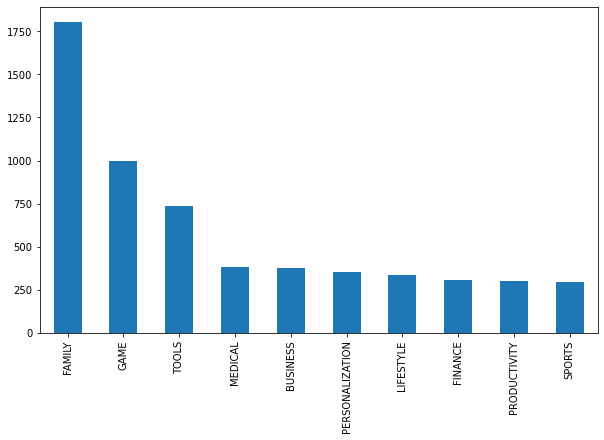

In [70]:
plt.figure(figsize=(10,6))
category.plot(kind='bar')
plt.show()

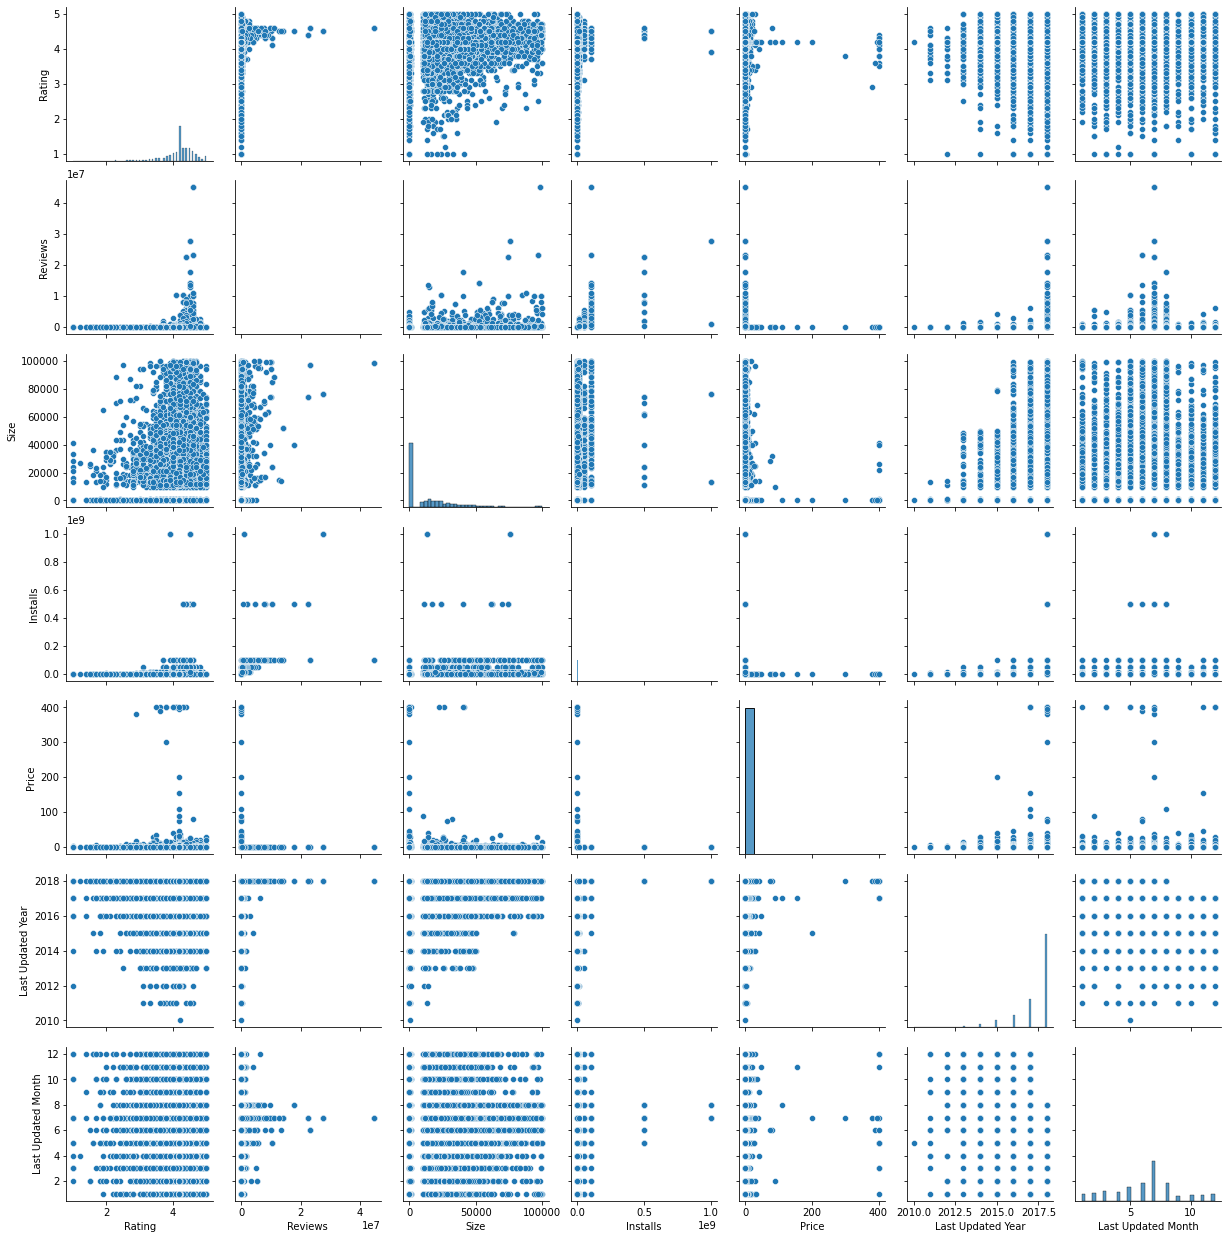

In [71]:
sns.pairplot(df)
plt.show()



encoder=LabelEncoder()
for i in obj:
    df[i]=encoder.fit_transform(df[i])

In [72]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,Last Updated Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,2018,1


<AxesSubplot:>

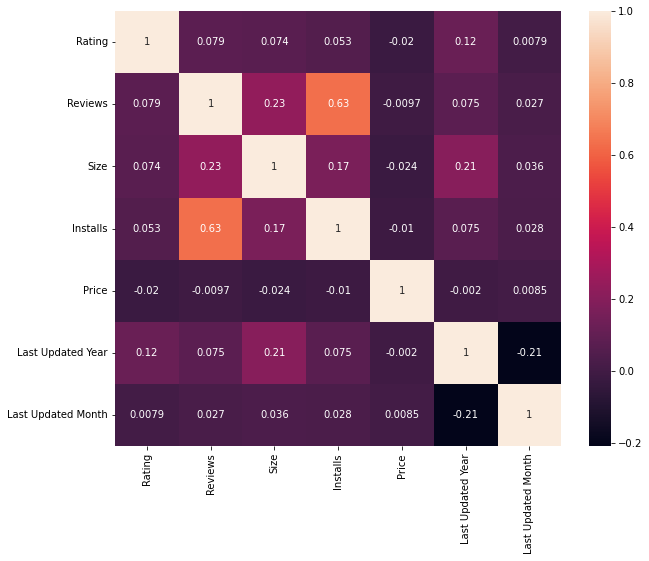

In [73]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [74]:
df['Installs'].max()

1000000000.0

In [75]:
df[df['Installs']==df['Installs'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,Last Updated Month
1654,Subway Surfers,GAME,4.5,27722264,76000.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1,2018,7
1700,Subway Surfers,GAME,4.5,27723193,76000.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1,2018,7
1750,Subway Surfers,GAME,4.5,27724094,76000.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1,2018,7
1872,Subway Surfers,GAME,4.5,27725352,76000.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1,2018,7
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000.0,1.000000e+09,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4,2018,8
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13000.0,1.000000e+09,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4,2018,8
3896,Subway Surfers,GAME,4.5,27711703,76000.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1,2018,7
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13000.0,1.000000e+09,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4,2018,8


In [76]:
Cate_install=df.groupby(['Category'])['Installs'].sum().sort_values()

In [77]:
Cate_install

Category
EVENTS                 1.067215e+07
BEAUTY                 1.369695e+07
COMICS                 1.758615e+07
PARENTING              2.397101e+07
MEDICAL                3.550062e+07
AUTO_AND_VEHICLES      4.377021e+07
HOUSE_AND_HOME         5.161246e+07
LIBRARIES_AND_DEMO     6.089591e+07
ART_AND_DESIGN         9.933310e+07
DATING                 1.052061e+08
BOOKS_AND_REFERENCE    1.349611e+08
WEATHER                1.393000e+08
FOOD_AND_DRINK         1.716887e+08
MAPS_AND_NAVIGATION    1.750299e+08
EDUCATION              2.083020e+08
TRAVEL_AND_LOCAL       2.606661e+08
FINANCE                3.166235e+08
LIFESTYLE              4.356008e+08
BUSINESS               4.919286e+08
ENTERTAINMENT          7.489600e+08
SOCIAL                 7.942648e+08
HEALTH_AND_FITNESS     8.034619e+08
VIDEO_PLAYERS          8.918677e+08
PERSONALIZATION        9.971688e+08
SPORTS                 1.062449e+09
SHOPPING               1.312749e+09
PHOTOGRAPHY            2.390898e+09
PRODUCTIVITY       

<AxesSubplot:ylabel='Installs'>

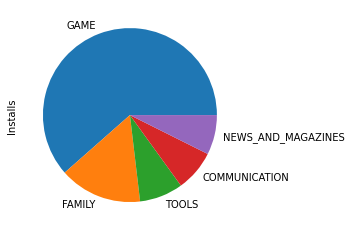

In [78]:
Cate_install.nlargest(5).plot.pie()

<AxesSubplot:ylabel='Installs'>

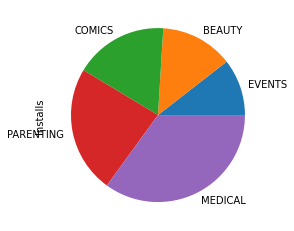

In [79]:
Cate_install.nsmallest(5).plot.pie()

# Checking how many apps are getting 5 star ratings

In [80]:
df['Rating'].unique()

array([4.1       , 3.9       , 4.7       , 4.5       , 4.3       ,
       4.4       , 3.8       , 4.2       , 4.6       , 4.        ,
       4.19333832, 4.8       , 4.9       , 3.6       , 3.7       ,
       3.2       , 3.3       , 3.4       , 3.5       , 3.1       ,
       5.        , 2.6       , 3.        , 1.9       , 2.5       ,
       2.8       , 2.7       , 1.        , 2.9       , 2.3       ,
       2.2       , 1.7       , 2.        , 1.8       , 2.4       ,
       1.6       , 2.1       , 1.4       , 1.5       , 1.2       ])

In [81]:
df1=df[df['Rating']==5]

In [82]:
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,Last Updated Month
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000.0,1000.0,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3,2018,6
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000.0,Free,0.0,Mature 17+,Dating,2018-07-17,3.0,4.0.3,2018,7
615,Awake Dating,DATING,5.0,2,70000.0,100.0,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4,2018,7
633,Spine- The dating app,DATING,5.0,5,9.3,500.0,Free,0.0,Teen,Dating,2018-07-14,4.0,4.0.3,2018,7
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100.0,Free,0.0,Mature 17+,Dating,2018-08-01,8.2,4.0.3,2018,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16000.0,100.0,Free,0.0,Everyone,Arcade,2017-06-19,2.5a,4.1,2017,6
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000.0,Free,0.0,Everyone,Lifestyle,2017-12-31,0.7.1,4.4,2017,12
10776,Monster Ride Pro,GAME,5.0,1,24000.0,10.0,Free,0.0,Everyone,Racing,2018-03-05,2.0,2.3,2018,3
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000.0,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1,2018,6


In [83]:
df1.shape

(266, 15)

**There are 266 apps having rating of 5**

In [84]:
val=df1['Type'].value_counts().reset_index()

In [85]:
val

,index,Type
0,Free,238
1,Paid,28


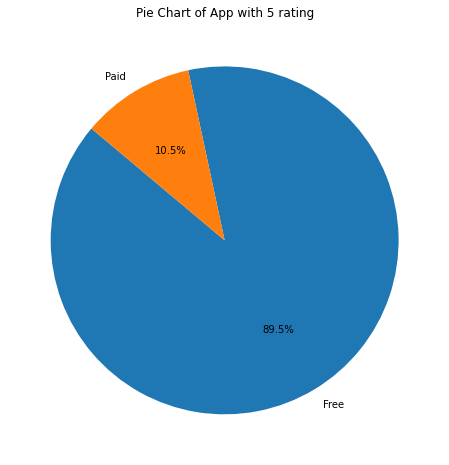

In [86]:
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(val['Type'], labels=val['index'], autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Pie Chart of App with 5 rating')

# Show the chart
plt.show()

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
encode=LabelEncoder()

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler=StandardScaler()

In [91]:
year_free_count=df[df['Type']=='Free']
df2_1=year_free_count.drop(['Last Updated'],axis=1).groupby('Last Updated Year')
Free_year_count=df2_1['Last Updated Year'].count()

In [92]:
year_free_count=df[df['Type']=='Paid']
df2_2=year_free_count.drop(['Last Updated'],axis=1).groupby('Last Updated Year')
Paid_year_count=df2_2['Last Updated Year'].count()

In [93]:
Free_year_count

Last Updated Year
2010       1
2011      12
2012      20
2013      75
2014     143
2015     362
2016     648
2017    1545
2018    5327
Name: Last Updated Year, dtype: int64

In [94]:
Paid_year_count

Last Updated Year
2011      3
2012      5
2013     27
2014     53
2015     77
2016     85
2017    154
2018    284
Name: Last Updated Year, dtype: int64

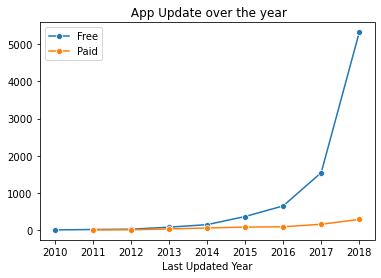

In [95]:
sns.lineplot(x=Free_year_count.index,y=Free_year_count.values,marker='o',label='Free')
sns.lineplot(x=Paid_year_count.index,y=Paid_year_count.values,marker='o',label='Paid')
plt.title(" App Update over the year")
plt.legend()
plt.show()

**As seen in the above plot , Before 2011 , there were no paid apps. However, as time has passed, the number of free apps has increased .From year 2010 to 2018 , free apps grown exponentially,where as there is no significant increase in paid apps. Most of the peoples choose free apps instead of paid.** 

In [96]:
month_free_count=df[df['Type']=='Free']
df2_1=month_free_count.drop(['Last Updated'],axis=1).groupby('Last Updated Month')
Free_month_count=df2_1['Last Updated Month'].count()

In [97]:
month_paid_count=df[df['Type']=='Paid']
df2_1=month_paid_count.drop(['Last Updated'],axis=1).groupby('Last Updated Month')
Paid_month_count=df2_1['Last Updated Month'].count()

In [98]:
Free_month_count

Last Updated Month
1      398
2      447
3      539
4      497
5      786
6      993
7     2255
8      975
9      255
10     335
11     315
12     338
Name: Last Updated Month, dtype: int64

In [99]:
Paid_month_count

Last Updated Month
1      39
2      43
3      64
4      57
5      71
6      73
7     120
8      68
9      28
10     35
11     33
12     57
Name: Last Updated Month, dtype: int64

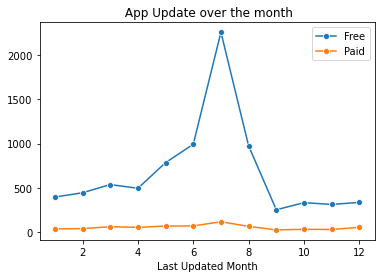

In [100]:
sns.lineplot(x=Free_month_count.index,y=Free_month_count.values,marker='o',label='Free')
sns.lineplot(x=Paid_month_count.index,y=Paid_month_count.values,marker='o',label='Paid')
plt.title(" App Update over the month")
plt.legend()
plt.show()

**Observe that from above plot most of the apps are updated arount June,july and August.**